<a href="https://colab.research.google.com/github/JamesGilJGBS/Portifolio/blob/main/SEO/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pytrends
#!pip install pyodbc

In [4]:
import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()

import requests
import pyodbc
import hashlib
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

import json

In [48]:
# Get Google Hot Trends data
print('Tendências do Dia: Hot Trends')
today_searches_df = pytrends.today_searches(pn='BR')
print(today_searches_df)

Tendências do Dia: Hot Trends
0               Palmeiras x Grêmio
1                  Umuarama Futsal
2    Agendamento vacina Vila Velha
3                        Megan Fox
4                  Rodrigo Pacheco
5                   Forças Armadas
6                      Bruno Viana
7              Francieli Fantinato
Name: query, dtype: object


In [65]:
termo = 'laço'

In [62]:
# Create payload and capture API tokens. Only needed for interest_over_time() and related_queries()
pytrends.build_payload(kw_list=[(str(termo))])

In [51]:
# Get Google Keyword Suggestions
print('Buscando...')
suggestions_dict = pytrends.suggestions(keyword=termo)
pd.DataFrame(data=suggestions_dict).drop('mid', axis=1)

Buscando...


,title,type
0,laço,Assunto
1,Gravata-borboleta,Acessório de moda
2,Laço,Insígnia
3,Laço,Assunto
4,Gifted,Filme de 2017


In [53]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrends.related_queries()
pd.DataFrame(data=related_queries_dict[termo]['top'].head(20))

,query,value
0,fazer laço,100
1,como fazer laço,94
2,como fazer,93
3,laço de fita,87
4,laço cabelo,33
5,menina de laço,31
6,laço de cetim,29
7,fazer laço de fita,28
8,laço de cabelo,26
9,como fazer laço de fita,25


In [54]:
pd.DataFrame(data=related_queries_dict[termo]['rising'].head(20))

,query,value
0,laço boutique duplo,26450
1,canal do laço ao vivo,25200
2,um laço de amor filme completo dublado,23450
3,assistir um laço de amor,21800
4,laço setembro amarelo,17400
5,setembro amarelo,17000
6,um laço de amor netflix,13550
7,canal top do laço,13450
8,laço formoso,13200
9,laço boutique com ponta,11100


In [58]:
related_topic = pytrends.related_topics()
related_topic[termo]['top'].drop(['link','topic_mid'], axis=1).head(20)

,value,formattedValue,hasData,topic_title,topic_type
0,100,100,True,Laço,Assunto
1,87,87,True,laço,Assunto
2,9,9,True,Cabelo,Assunto
3,9,9,True,Cetim,Assunto
4,7,7,True,Menina Bonita do Laço de Fita,Livro por Ana Maria Machado
5,4,4,True,Boutique,Função do edifício
6,4,4,True,Cor-de-rosa,Cor
7,3,3,True,Gifted,Filme de 2017
8,3,3,True,PNG,Formato de arquivo
9,3,3,True,Tiara,Assunto


In [55]:
related_topic = pytrends.related_topics()
related_topic[termo]['rising'].drop(['link','topic_mid'], axis=1).head(20)

,value,formattedValue,topic_title,topic_type
0,187400,Aumento repentino,Gifted,Filme de 2017
1,36750,Aumento repentino,Churrascaria,Assunto
2,36250,Aumento repentino,Mega hair,Assunto
3,22400,Aumento repentino,Biscuit,Assunto
4,6100,Aumento repentino,Canal do Laço +,"Serviço de produção de vídeos em Bonito, Mato ..."
5,4700,Mais 4.700%,Tiara,Assunto
6,3850,Mais 3.850%,Amora,Fruta
7,1800,Mais 1.800%,Boutique,Função do edifício
8,850,Mais 850%,Mercado livre,Assunto
9,850,Mais 850%,Música infantojuvenil,Assunto


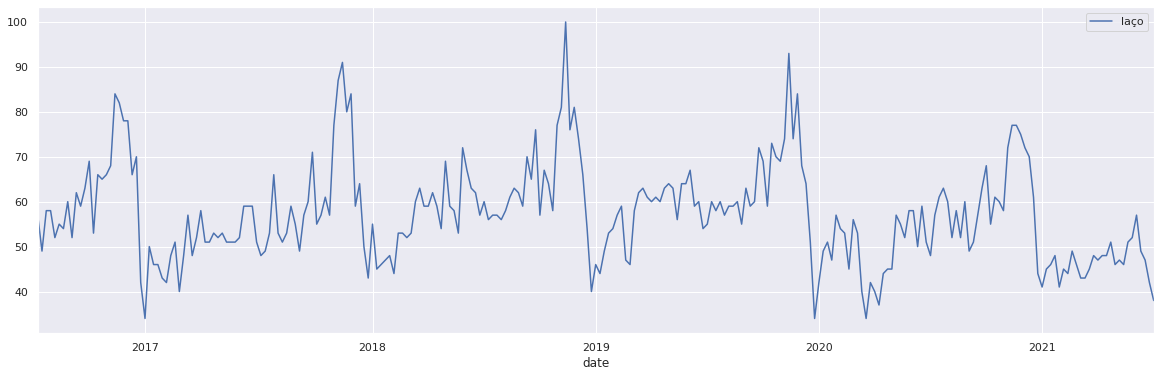

In [66]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo], index='date')\
.plot(kind='line', stacked=True, figsize=(20,6))

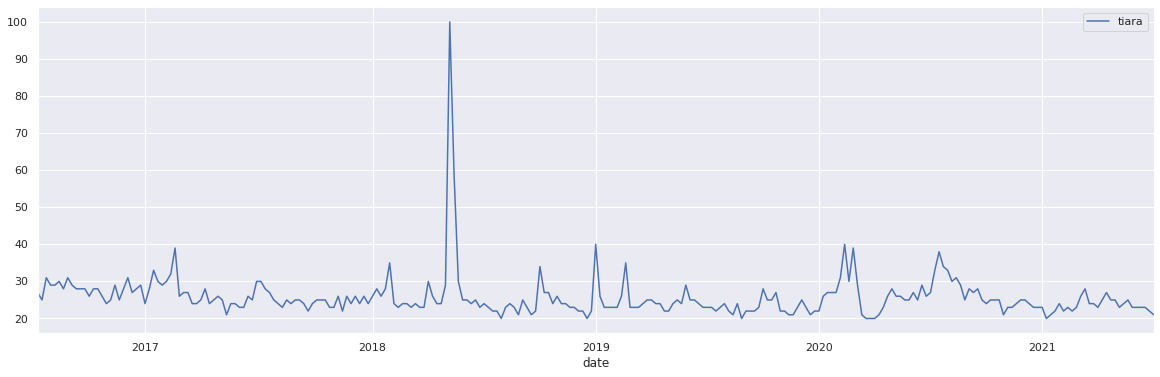

In [68]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['tiara'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['tiara'], index='date')\
.plot(kind='line', stacked=True, figsize=(20,6))

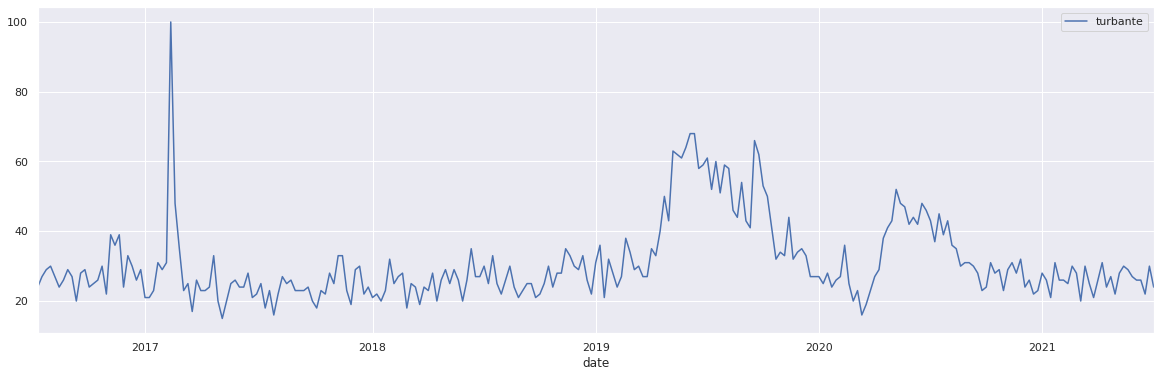

In [71]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['turbante'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['turbante'], index='date')\
.plot(kind='line', stacked=True, figsize=(20,6))